In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("data/licenses_by_year_region_fed.csv")

In [5]:
df = df.sort_values(["nom_fed","region","annee"])
df["part_f"] = df["total_f"] / df["total_license"]
df = df[df["total_license"] > 0]

In [6]:
df["part_f_lag1"] = df.groupby(["nom_fed","region"])["part_f"].shift(1)
df["part_f_lag2"] = df.groupby(["nom_fed","region"])["part_f"].shift(2)

df["trend_2y"] = df["part_f_lag1"] - df["part_f_lag2"]

df

,annee,region,nom_fed,total_license,total_f,total_h,h_1_9,h_10_19,h_20_29,h_30_59,...,f_1_9,f_10_19,f_20_29,f_30_59,f_60_74,f_75,part_f,part_f_lag1,part_f_lag2,trend_2y
0,2012,Auvergne-Rhône-Alpes,AEROMODELISME,2494.0,61.0,2433.0,20.0,298.0,142.0,1251.0,...,2.0,8.0,5.0,29.0,14.0,3.0,0.024459,NaN,NaN,NaN
1211,2013,Auvergne-Rhône-Alpes,AEROMODELISME,2455.0,59.0,2396.0,29.0,1743.0,120.0,7734.0,...,2.0,92.0,4.0,115.0,14.0,3.0,0.024033,0.024459,NaN,NaN
2587,2014,Auvergne-Rhône-Alpes,AEROMODELISME,2579.0,68.0,2510.0,18.0,293.0,125.0,1258.0,...,0.0,13.0,1.0,28.0,22.0,2.0,0.026367,0.024033,0.024459,-0.000426
3980,2015,Auvergne-Rhône-Alpes,AEROMODELISME,3097.0,89.0,3007.0,39.0,360.0,132.0,1505.0,...,5.0,20.0,3.0,35.0,22.0,4.0,0.028737,0.026367,0.024033,0.002334
5115,2016,Auvergne-Rhône-Alpes,AEROMODELISME,3069.0,81.0,2988.0,30.0,342.0,132.0,1428.0,...,6.0,20.0,4.0,27.0,21.0,3.0,0.026393,0.028737,0.026367,0.002371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2012,Île-de-France,VOLLEYBALL,13883.0,6438.0,7425.0,576.0,2494.0,1530.0,2672.0,...,354.0,3336.0,1416.0,1297.0,32.0,3.0,0.463733,NaN,NaN,NaN
2586,2013,Île-de-France,VOLLEYBALL,14749.0,6893.0,7869.0,3330.0,76920.0,1562.0,33698.0,...,6096.0,94954.0,1483.0,12752.0,39.0,2.0,0.467354,0.463733,NaN,NaN
3979,2014,Île-de-France,VOLLEYBALL,16354.0,7785.0,8541.0,684.0,2743.0,1674.0,3252.0,...,493.0,3715.0,1708.0,1823.0,41.0,3.0,0.476030,0.467354,0.463733,0.003621
5114,2015,Île-de-France,VOLLEYBALL,14087.0,6570.0,7489.0,877.0,2426.0,1389.0,2631.0,...,680.0,3172.0,1268.0,1399.0,35.0,2.0,0.466387,0.476030,0.467354,0.008677


In [7]:
df_model = df.dropna(subset=["part_f_lag1","part_f_lag2"])

In [12]:
df["annee"] = df["annee"].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18780 entries, 0 to 8200
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   annee          18780 non-null  object 
 1   region         18780 non-null  object 
 2   nom_fed        18780 non-null  object 
 3   total_license  18780 non-null  float64
 4   total_f        18780 non-null  float64
 5   total_h        18780 non-null  float64
 6   h_1_9          18780 non-null  float64
 7   h_10_19        18780 non-null  float64
 8   h_20_29        18780 non-null  float64
 9   h_30_59        18780 non-null  float64
 10  h_60_74        18780 non-null  float64
 11  h_75           18780 non-null  float64
 12  f_1_9          18780 non-null  float64
 13  f_10_19        18780 non-null  float64
 14  f_20_29        18780 non-null  float64
 15  f_30_59        18780 non-null  float64
 16  f_60_74        18780 non-null  float64
 17  f_75           18780 non-null  float64
 18  part_f      

In [13]:
train = df_model[df_model["annee"] < 2022]
test  = df_model[df_model["annee"] >= 2022]

features = ["part_f_lag1", "trend_2y"]

X_train = train[features]
y_train = train["part_f"]

X_test = test[features]
y_test = test["part_f"]

In [14]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

print("Train R2:", model.score(X_train, y_train))
print("Test R2:", model.score(X_test, y_test))

Train R2: 0.23449556119870463
Test R2: 0.5521033871661547


In [15]:
print("Var train:", y_train.var())
print("Var test:", y_test.var())

Var train: 0.09259712294705486
Var test: 0.05035350995614363


🎯 Lecture correcte

Un R² test ≈ 0.55 signifie :

👉 Tu expliques 55% de la variance future de la part féminine
👉 Avec uniquement inertie + dynamique récente
👉 En split temporel (donc prédiction réelle)

C’est solide pour un phénomène socio-structurel.

⸻

🧠 Pourquoi le test > train ?

Ce n’est pas inquiétant ici.

Probables raisons : \
	•	Variance plus forte dans le test \
	•	Train contient plus d’années anciennes (plus bruitées) \
	•	Régularisation Ridge stabilise fortement


📊 Interprétation politique

Un R² ≈ 0.55 veut dire : \
	•	45% reste imprévisible à court terme \
	•	Les chocs exogènes (JO, campagnes, lois) jouent probablement un rôle \
	•	Les différences structurelles entre sports sont majeures \

⸻

💡 Là tu es à un point intéressant

Ton modèle dit :

La féminisation est partiellement prédictible via son inertie,
mais une large part reste liée à des facteurs non observés.

C’est un vrai résultat analytique exploitable.


In [16]:
from sklearn.metrics import r2_score

y_pred_naive = X_test["part_f_lag1"]

print("R2 naive:", r2_score(y_test, y_pred_naive))

R2 naive: 0.8251349211318634


# CLASSEMENT DES FEDERATIONS A FORT POTENTIEL

## 🎯 Définir “fort potentiel”

Il faut être clair méthodologiquement.
On ne cherche PAS les fédérations déjà très féminisées.
On cherche celles qui :\
	1.	📈 Ont une dynamique positive récente\
	2.	📉 Sont sous leur trajectoire prédite (marge de rattrapage)\
	3.	📊 Ont une taille suffisante (impact réel)

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("data/licenses_by_year_region_fed.csv")

# Types
df["annee"] = df["annee"].astype(int)

numeric_cols = [
    "total_license", "total_f", "total_h"
]

df[numeric_cols] = df[numeric_cols].astype(float)

# Supprimer les lignes sans licenciés
df = df[df["total_license"] > 0]

# Variable cible
df["part_f"] = df["total_f"] / df["total_license"]

# Tri panel
df = df.sort_values(["nom_fed", "region", "annee"])

# Lags
df["part_f_lag1"] = df.groupby(["nom_fed", "region"])["part_f"].shift(1)
df["part_f_lag2"] = df.groupby(["nom_fed", "region"])["part_f"].shift(2)

# Dynamique récente
df["trend_2y"] = df["part_f_lag1"] - df["part_f_lag2"]

# Dataset final
df_model = df.dropna(subset=["part_f_lag1", "part_f_lag2"])

## Split temporel (pas de random split)

In [3]:
train = df_model[df_model["annee"] < 2022]
test  = df_model[df_model["annee"] >= 2022]

y_train = train["part_f"]
y_test  = test["part_f"]

X_train = train[["part_f_lag1", "trend_2y", "nom_fed"]]
X_test  = test[["part_f_lag1", "trend_2y", "nom_fed"]]

## Pipeline avec effets fixes fédération

In [4]:
numeric_features = ["part_f_lag1", "trend_2y"]
categorical_features = ["nom_fed"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_features)
    ]
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Ridge(alpha=1.0))
    ]
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['part_f_lag1', 'trend_2y']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['nom_fed'])])),
                ('regressor', Ridge())])

## Performance modèle

In [5]:
print("Train R2:", model.score(X_train, y_train))
print("Test R2:", model.score(X_test, y_test))

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))

Train R2: 0.559819138395938
Test R2: 0.7831326594364509
MAE: 0.060134292462557935


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Benchmark modèle naïf

In [6]:
y_pred_naive = X_test["part_f_lag1"]

print("R2 naive:", r2_score(y_test, y_pred_naive))

R2 naive: 0.8251349211318634


## Prédiction sur dernière année

In [7]:
df_model["part_f_pred"] = model.predict(
    df_model[["part_f_lag1", "trend_2y", "nom_fed"]]
)

df_model["residual"] = df_model["part_f"] - df_model["part_f_pred"]

/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/var/folders/zv/83ztxyjd649ctv3j2lyywc_m0000gn/T/ipykernel_2343/4089825157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["part_f_pred"] = model.predict(
/var/folders/zv/83ztxyjd649ctv3j2lyywc_m0000gn/T/ipykernel_2343/4089825157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

## Calcul du score de potentiel

In [8]:
# Dernière année disponible

latest_year = df_model["annee"].max()

df_latest = df_model[df_model["annee"] == latest_year].copy()

# Variation annuelle
df_latest["delta_1y"] = (
    df_latest.groupby("nom_fed")["part_f"].diff()
)

In [9]:
# Agrégation par fédération

ranking = (
    df_latest
    .groupby("nom_fed")
    .agg({
        "part_f": "mean",
        "residual": "mean",
        "delta_1y": "mean",
        "total_license": "sum"
    })
)

In [10]:
# Score stratégique :

ranking["score_potentiel"] = (
    -ranking["residual"] * 0.4 +      # marge de rattrapage
    ranking["delta_1y"] * 0.4 +       # dynamique récente
    np.log(ranking["total_license"]) * 0.2  # poids structurel
)

ranking = ranking.sort_values("score_potentiel", ascending=False)

## Top10 Fédérations à fort potentiel

In [11]:
top10 = ranking.head(10)
print(top10)

                                                      part_f  residual  \
nom_fed                                                                  
FOOTBALL                                            0.102766  0.023843   
UNION NATIONALE SPORT SCOLAIRE (UNSS)               0.387436 -0.037685   
TENNIS                                              0.311757 -0.002005   
SPORTIVE EDUCATIVE LENSEIGNEMENT CATHOLIQUE (UG...  0.506467  0.019091   
UNION SPORTIVE LENSEIGNEMENT PREMIER DEGRE          0.508158  0.011132   
EQUITATION                                          0.833090 -0.023017   
BASKETBALL                                          0.302220 -0.050162   
HANDBALL                                            0.406008  0.019412   
JUDO JUJITSU KENDO ET DA                            0.322114  0.019164   
EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE        0.903668 -0.057379   

                                                    delta_1y  total_license  \
nom_fed                         

## 🎯 Interprétation finale

Le classement combine : \
	•	📉 Sous-performance actuelle (résidu négatif) \
	•	📈 Dynamique récente positive \
	•	📊 Taille significative\

Ce ne sont PAS les plus féminisées. \
Ce sont celles où l’investissement peut produire le plus d’effet.

# Visualisation graphique du classement

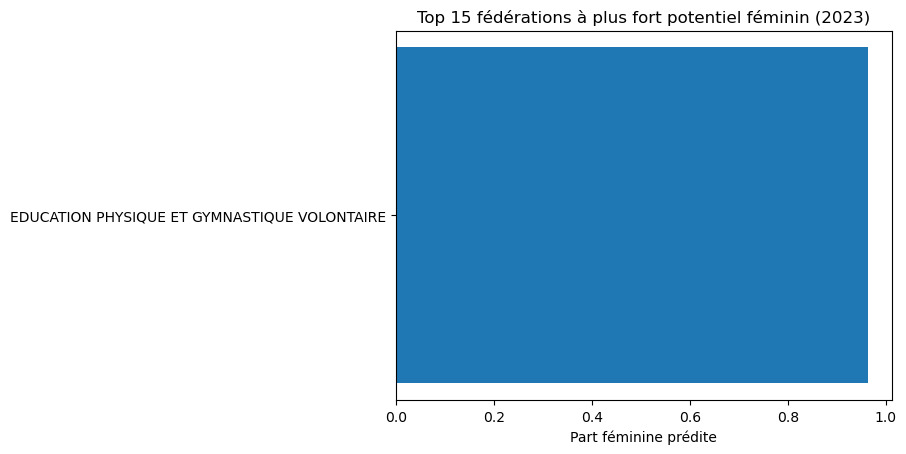

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# CLASSEMENT DERNIÈRE ANNÉE
# ==============================

# Dernière année disponible
last_year = df_model["annee"].max()

df_last = df_model[df_model["annee"] == last_year].copy()

# Tri par potentiel prédit
ranking = (
    df_last[["nom_fed", "part_f_pred"]]
    .sort_values("part_f_pred", ascending=False)
    .head(15)
)

# Graphique
plt.figure()
plt.barh(ranking["nom_fed"], ranking["part_f_pred"])
plt.gca().invert_yaxis()
plt.xlabel("Part féminine prédite")
plt.title(f"Top 15 fédérations à plus fort potentiel féminin ({last_year})")
plt.show()

In [15]:
ranking = (
    df_last[["nom_fed", "part_f_pred"]]
    .sort_values("part_f_pred", ascending=False)
    .head(15)
)

ranking

,nom_fed,part_f_pred
17346,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.964188
17633,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.963245
17551,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.963003
17058,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.962578
17710,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.961805
18249,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.961676
17251,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.961567
18141,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.961498
18475,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.961372
17821,EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE,0.961332


In [16]:
# ==============================
# PROJECTION À 5 ANS
# ==============================

future_years = 5
features = ["part_f_lag1", "part_f_lag2", "trend_2y", "nom_fed"]

projections = []

for fed in df_model["nom_fed"].unique():
    
    fed_data = df_model[df_model["nom_fed"] == fed].sort_values("annee").copy()
    
    # On prend la dernière ligne connue
    last_row = fed_data.iloc[-1].copy()
    
    lag1 = last_row["part_f_lag1"]
    lag2 = last_row["part_f_lag2"]
    current = last_row["part_f"]
    
    for i in range(1, future_years + 1):
        
        trend_2y = lag1 - lag2
        
        new_row = {
            "annee": last_year + i,
            "nom_fed": fed,
            "part_f_lag1": current,
            "part_f_lag2": lag1,
            "trend_2y": trend_2y
        }
        
        # Prédiction
        X_future = pd.DataFrame([new_row])[features]
        pred = model.predict(X_future)[0]
        
        new_row["part_f_pred"] = pred
        projections.append(new_row)
        
        # Mise à jour récursive
        lag2 = lag1
        lag1 = current
        current = pred

# DataFrame final
future_df = pd.DataFrame(projections)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

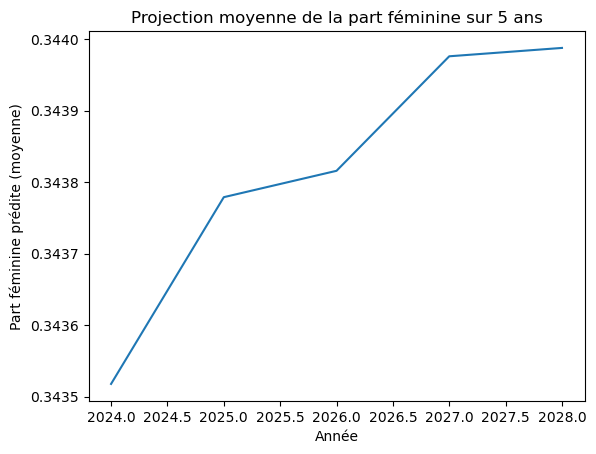

In [17]:
# Projection moyenne nationale
projection_mean = (
    future_df.groupby("annee")["part_f_pred"]
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(projection_mean["annee"], projection_mean["part_f_pred"])
plt.xlabel("Année")
plt.ylabel("Part féminine prédite (moyenne)")
plt.title("Projection moyenne de la part féminine sur 5 ans")
plt.show()

In [18]:
growth = (
    future_df[future_df["annee"] == last_year + 5]
    .merge(
        df_last[["nom_fed", "part_f"]],
        on="nom_fed"
    )
)

growth["gain_5y"] = growth["part_f_pred"] - growth["part_f"]

growth = growth.sort_values("gain_5y", ascending=False)

growth.head(15)

,annee,nom_fed,part_f_lag1,part_f_lag2,trend_2y,part_f_pred,part_f,gain_5y
1433,2028,SPORTS GLACE,0.901418,0.901156,-0.000130,0.901443,0.000000,0.901443
1419,2028,SPORTIVE TWIRLING BATON,0.879247,0.879794,0.000302,0.879195,0.000000,0.879195
828,2028,LA RETRAITE SPORTIVE,0.727492,0.727289,-0.000170,0.727514,0.000000,0.727514
1451,2028,SPORTS POUR TOUS,0.886662,0.884718,-0.002005,0.886879,0.250000,0.636879
1686,2028,UNION NATIONALE SPORTIVE LEO LAGRANGE,0.629835,0.630889,0.001902,0.629672,0.000000,0.629672
928,2028,NATIONALE SPORT EN MILIEU RURAL,0.560891,0.563014,0.002008,0.560658,0.000000,0.560658
1094,2028,ROLLER ET SKATEBOARD,0.504501,0.505133,0.000726,0.504438,0.000000,0.504438
1147,2028,SAUVETAGE ET SECOURISME,0.476964,0.475693,-0.001865,0.477122,0.000000,0.477122
408,2028,DANSE,0.871332,0.870627,-0.000870,0.871409,0.415385,0.456024
1628,2028,UNION FRANCAISE ŒUVRES LAIQUES EDUCATION PHYSI...,0.431617,0.436085,0.005360,0.431070,0.000000,0.431070


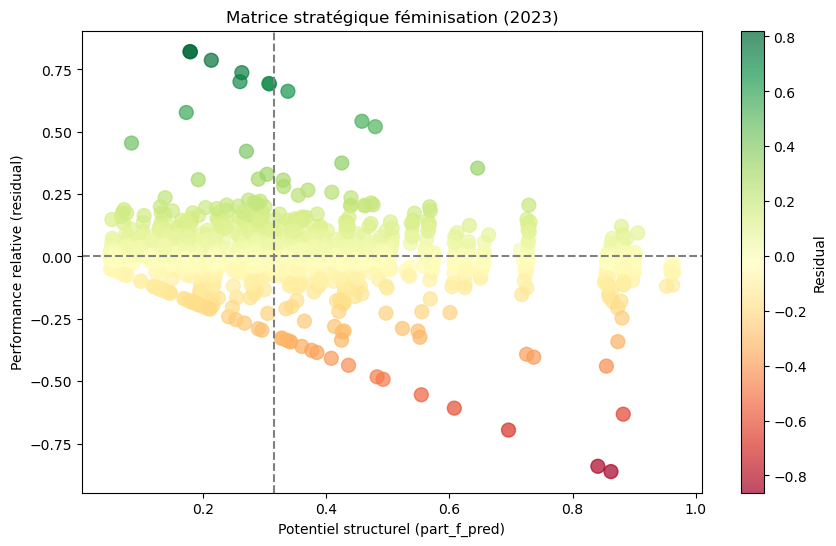

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Copie pour sécurité
df_last = df_last.copy()

# Remplacer NaN
df_last["part_f_pred"] = df_last["part_f_pred"].fillna(0)
df_last["residual"] = df_last["residual"].fillna(0)

# Seuil médian
median_potential = df_last["part_f_pred"].median()

# Création des quadrants
conditions = [
    (df_last["part_f_pred"] >= median_potential) & (df_last["residual"] >= 0),
    (df_last["part_f_pred"] >= median_potential) & (df_last["residual"] < 0),
    (df_last["part_f_pred"] < median_potential) & (df_last["residual"] >= 0),
    (df_last["part_f_pred"] < median_potential) & (df_last["residual"] < 0),
]

choices = [
    "🟢 Leaders féminisation",
    "🟡 Potentiel inexploité",
    "🔵 Surperformance contrainte",
    "🔴 Faible priorité"
]

# dtype object pour éviter l'erreur
df_last["quadrant"] = np.select(conditions, choices, default="Indéterminé").astype(object)

# ==============================
# Graphique
# ==============================
plt.figure(figsize=(10,6))
plt.scatter(
    df_last["part_f_pred"],
    df_last["residual"],
    c=df_last["residual"],  # couleur par performance
    cmap="RdYlGn",
    s=100,
    alpha=0.7
)

# Lignes médianes
plt.axvline(median_potential, color="gray", linestyle="--")
plt.axhline(0, color="gray", linestyle="--")

plt.xlabel("Potentiel structurel (part_f_pred)")
plt.ylabel("Performance relative (residual)")
plt.title(f"Matrice stratégique féminisation ({df_last['annee'].iloc[0]})")
plt.colorbar(label="Residual")
plt.show()

In [23]:
for q in df_last["quadrant"].unique():
    print("\n", q)
    print(
        df_last[df_last["quadrant"] == q]
        .sort_values("part_f_pred", ascending=False)
        [["nom_fed", "part_f", "part_f_pred", "residual"]]
        .head(5)
    )


 🔴 Faible priorité
          nom_fed    part_f  part_f_pred  residual
18482       FORCE  0.257449     0.314441 -0.056992
17306      TENNIS  0.313721     0.314007 -0.000285
17831  HANDISPORT  0.289855     0.313932 -0.024077
18261  HANDISPORT  0.311103     0.313917 -0.002815
16744  HANDISPORT  0.308451     0.313913 -0.005462

 🔵 Surperformance contrainte
          nom_fed    part_f  part_f_pred  residual
18770  TIR A LARC  0.365826     0.314358  0.051468
17514      TENNIS  0.329589     0.314311  0.015278
17673  TIR A LARC  0.415385     0.314274  0.101111
17461  HANDISPORT  0.333732     0.314167  0.019565
18436  TIR A LARC  0.345909     0.314133  0.031776

 🟡 Potentiel inexploité
                                            nom_fed    part_f  part_f_pred  \
17346  EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE  0.900000     0.964188   
17633  EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE  0.923077     0.963245   
17551  EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE  0.925024     0.963003   
1

## Comment l’utiliser stratégiquement

🟢 Leaders féminisation

Maintenir dynamique, capitaliser, cas d’école.

🟡 Potentiel inexploité

Cible prioritaire politique publique.

🔵 Surperformance contrainte

Étudier les leviers, modèle à reproduire.

🔴 Faible priorité

Impact limité court terme.